<a href="https://colab.research.google.com/github/good-thinking/easy-coding2/blob/main/test_number_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##US Census and Election Results (2000-2020)

## Predict U.S. Presidential Election Results via Rich County Census Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/county_census_and_election_result.csv", encoding ="cp949" )

In [4]:
df

,year,county_fips,inctot,mortamt1,avrg_age,ftotinc,foodstmp_1_freq,foodstmp_2_freq,sex_2_freq,sex_1_freq,...,empstat_3.0_freq,empstat_2.0_freq,state_po,county_name,democrat,green,liberitarian,other,republican,winner
0,2000,1,24566.4,634.6,46.0,46912.7,93.6,6.4,54.0,46.0,...,38.4,3.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,2,33842.9,1080.1,42.4,65021.9,95.3,4.7,50.3,49.7,...,25.2,4.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,4,28331.7,814.7,45.3,52826.7,95.8,4.2,52.1,47.9,...,38.3,3.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,5,22782.6,557.5,46.2,43941.3,92.5,7.5,53.0,47.0,...,37.8,3.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,6,32245.0,1216.3,43.8,61455.3,95.7,4.3,52.0,48.0,...,35.1,3.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7521,2020,55117,26884.0,704.0,50.3,52592.7,95.6,4.4,49.5,50.5,...,42.3,1.4,WI,SHEBOYGAN,27101.0,2.0,896.0,403.0,37609.0,1.0
7522,2020,55127,28065.5,846.0,49.0,63315.2,94.9,5.1,49.4,50.6,...,37.6,0.8,WI,WALWORTH,22789.0,15.0,641.0,304.0,33851.0,1.0
7523,2020,55133,38557.0,990.6,50.4,80433.1,95.9,4.1,52.8,47.2,...,37.3,2.0,WI,WAUKESHA,103906.0,54.0,3023.0,1364.0,159649.0,1.0
7524,2020,55139,25796.1,667.3,45.9,49219.4,93.5,6.5,47.9,52.1,...,41.5,1.6,WI,WINNEBAGO,44060.0,38.0,1629.0,509.0,47796.0,1.0


In [5]:
df.describe()

,year,county_fips,inctot,mortamt1,avrg_age,ftotinc,foodstmp_1_freq,foodstmp_2_freq,sex_2_freq,sex_1_freq,...,educ_attain_4.0_freq,empstat_1.0_freq,empstat_3.0_freq,empstat_2.0_freq,democrat,green,liberitarian,other,republican,winner
count,7526.000000,7526.000000,7526.000000,7526.000000,7526.000000,7526.000000,7526.000000,7526.000000,7526.000000,7526.000000,...,7526.000000,7526.000000,7526.000000,7526.000000,1.670000e+03,1670.000000,1670.000000,1670.000000,1.670000e+03,1670.000000
mean,2012.369253,27810.761228,28325.447077,884.343848,46.748220,57025.384999,90.560404,9.439596,51.956683,48.043317,...,1.261175,58.670648,37.460218,3.869280,1.158984e+05,167.460479,668.785629,4803.562275,8.568574e+04,0.488623
std,4.916645,16197.855610,6973.567827,284.898492,2.641396,13720.562319,4.974988,4.974988,1.708150,1.708106,...,0.919959,6.223587,5.988654,1.557713,1.918876e+05,805.370013,2083.527700,10236.284021,9.659596e+04,0.500020
min,2000.000000,1.000000,14165.200000,397.100000,36.100000,31193.400000,58.000000,0.400000,33.400000,38.400000,...,0.000000,30.700000,20.300000,0.300000,2.474000e+03,0.000000,0.000000,0.000000,2.187000e+03,0.000000
25%,2008.000000,13021.000000,23549.800000,680.125000,45.200000,47305.025000,87.700000,5.800000,51.100000,47.000000,...,0.700000,54.900000,33.400000,2.700000,2.843275e+04,0.000000,0.000000,756.250000,3.562700e+04,0.000000
50%,2013.000000,28000.000000,26843.600000,808.200000,46.700000,53615.350000,91.200000,8.800000,52.100000,47.900000,...,1.000000,59.200000,36.800000,3.600000,5.305350e+04,0.000000,0.000000,1856.000000,5.448950e+04,0.000000
75%,2017.000000,42000.000000,31579.250000,1019.500000,48.200000,63757.000000,94.200000,12.300000,53.000000,48.900000,...,1.500000,63.000000,41.000000,4.700000,1.281622e+05,0.000000,0.000000,4808.250000,1.002938e+05,1.000000
max,2020.000000,56000.000000,68229.100000,2080.900000,59.600000,137573.700000,99.600000,42.000000,61.600000,66.600000,...,7.900000,78.300000,67.200000,12.400000,3.028885e+06,21660.000000,35452.000000,200201.000000,1.145530e+06,1.000000


In [7]:
df2 = df.loc[df["year"].isin([2008, 2012, 2016, 2020])] 
## select the rows in the dataset that have the votinig labels( yeas : 2008, 2012, 2016, 2020)

In [8]:
df3 = df2.reset_index(drop = True) ##reset index

In [9]:
df3

,year,county_fips,inctot,mortamt1,avrg_age,ftotinc,foodstmp_1_freq,foodstmp_2_freq,sex_2_freq,sex_1_freq,...,empstat_3.0_freq,empstat_2.0_freq,state_po,county_name,democrat,green,liberitarian,other,republican,winner
0,2008,1000,22523.9,591.8,47.0,44879.5,90.6,9.4,53.4,46.6,...,41.6,3.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2008,1003,27222.4,902.2,48.6,53308.6,94.2,5.8,52.5,47.5,...,43.5,2.4,AL,BALDWIN,19386.0,0.0,0.0,756.0,61271.0,1.0
2,2008,1015,20951.6,551.7,47.1,39712.5,89.1,10.9,54.8,45.2,...,41.1,4.5,AL,CALHOUN,16334.0,0.0,0.0,560.0,32348.0,1.0
3,2008,1055,24017.6,658.6,48.2,47650.0,94.2,5.8,54.6,45.4,...,46.8,2.9,AL,ETOWAH,13497.0,0.0,0.0,645.0,30595.0,1.0
4,2008,1073,28109.5,812.4,47.2,54993.2,93.5,6.5,55.0,45.0,...,38.1,3.4,AL,JEFFERSON,166121.0,0.0,0.0,2482.0,149921.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1853,2020,55117,26884.0,704.0,50.3,52592.7,95.6,4.4,49.5,50.5,...,42.3,1.4,WI,SHEBOYGAN,27101.0,2.0,896.0,403.0,37609.0,1.0
1854,2020,55127,28065.5,846.0,49.0,63315.2,94.9,5.1,49.4,50.6,...,37.6,0.8,WI,WALWORTH,22789.0,15.0,641.0,304.0,33851.0,1.0
1855,2020,55133,38557.0,990.6,50.4,80433.1,95.9,4.1,52.8,47.2,...,37.3,2.0,WI,WAUKESHA,103906.0,54.0,3023.0,1364.0,159649.0,1.0
1856,2020,55139,25796.1,667.3,45.9,49219.4,93.5,6.5,47.9,52.1,...,41.5,1.6,WI,WINNEBAGO,44060.0,38.0,1629.0,509.0,47796.0,1.0


In [10]:
print(df3.isnull().sum())

year                      0
county_fips               0
inctot                    0
mortamt1                  0
avrg_age                  0
ftotinc                   0
foodstmp_1_freq           0
foodstmp_2_freq           0
sex_2_freq                0
sex_1_freq                0
marst_5_freq              0
marst_6_freq              0
marst_1_freq              0
marst_4_freq              0
marst_3_freq              0
marst_2_freq              0
race_1_freq               0
race_2_freq               0
race_7_freq               0
race_8_freq               0
race_5_freq               0
race_6_freq               0
race_3_freq               0
race_4_freq               0
race_9_freq               0
ctz_stat_1_freq           0
ctz_stat_3_freq           0
ctz_stat_2_freq           0
lang_1_freq               0
lang_2_freq               0
educ_attain_2.0_freq      0
educ_attain_1.0_freq      0
educ_attain_3.0_freq      0
educ_attain_4.0_freq      0
empstat_1.0_freq          0
empstat_3.0_freq    

In [25]:
df3.columns

Index(['year', 'inctot', 'mortamt1', 'avrg_age', 'ftotinc', 'foodstmp_1_freq',
       'foodstmp_2_freq', 'sex_2_freq', 'sex_1_freq', 'marst_5_freq',
       'marst_6_freq', 'marst_1_freq', 'marst_4_freq', 'marst_3_freq',
       'marst_2_freq', 'race_1_freq', 'race_2_freq', 'race_7_freq',
       'race_8_freq', 'race_5_freq', 'race_6_freq', 'race_3_freq',
       'race_4_freq', 'race_9_freq', 'ctz_stat_1_freq', 'ctz_stat_3_freq',
       'ctz_stat_2_freq', 'lang_1_freq', 'lang_2_freq', 'educ_attain_2.0_freq',
       'educ_attain_1.0_freq', 'educ_attain_3.0_freq', 'educ_attain_4.0_freq',
       'empstat_1.0_freq', 'empstat_3.0_freq', 'empstat_2.0_freq', 'winner'],
      dtype='object')

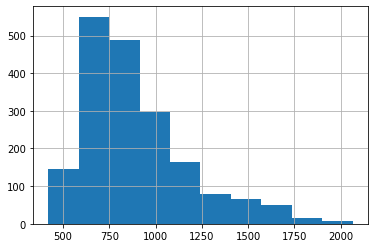

In [27]:
df3["mortamt1"].hist()

## we will drop the categorical state names and abbreviation. 
##We will also drop the all the number of votes labels except for "winner" columns (0 for democrats and 1 for republican). ##
##We don't concern other parties as they do not have a history of winning anyway.

In [11]:
df3 = df3.drop(columns = ['county_fips', 'state_po', 'county_name', 'democrat',
                                             'green', 'liberitarian', 'other', 'republican'] )

In [12]:
df3 = df3.fillna(method = "ffill")
# 결측값을 앞의 데이터로 채우는 과정. 

In [13]:
df3.isnull().sum()

year                    0
inctot                  0
mortamt1                0
avrg_age                0
ftotinc                 0
foodstmp_1_freq         0
foodstmp_2_freq         0
sex_2_freq              0
sex_1_freq              0
marst_5_freq            0
marst_6_freq            0
marst_1_freq            0
marst_4_freq            0
marst_3_freq            0
marst_2_freq            0
race_1_freq             0
race_2_freq             0
race_7_freq             0
race_8_freq             0
race_5_freq             0
race_6_freq             0
race_3_freq             0
race_4_freq             0
race_9_freq             0
ctz_stat_1_freq         0
ctz_stat_3_freq         0
ctz_stat_2_freq         0
lang_1_freq             0
lang_2_freq             0
educ_attain_2.0_freq    0
educ_attain_1.0_freq    0
educ_attain_3.0_freq    0
educ_attain_4.0_freq    0
empstat_1.0_freq        0
empstat_3.0_freq        0
empstat_2.0_freq        0
winner                  1
dtype: int64

In [14]:
df3 = df3.fillna(method = "bfill")
#처음 결측값을 뒤에 데이터로 채우는 과정. 

In [15]:
df3.isnull().sum()

year                    0
inctot                  0
mortamt1                0
avrg_age                0
ftotinc                 0
foodstmp_1_freq         0
foodstmp_2_freq         0
sex_2_freq              0
sex_1_freq              0
marst_5_freq            0
marst_6_freq            0
marst_1_freq            0
marst_4_freq            0
marst_3_freq            0
marst_2_freq            0
race_1_freq             0
race_2_freq             0
race_7_freq             0
race_8_freq             0
race_5_freq             0
race_6_freq             0
race_3_freq             0
race_4_freq             0
race_9_freq             0
ctz_stat_1_freq         0
ctz_stat_3_freq         0
ctz_stat_2_freq         0
lang_1_freq             0
lang_2_freq             0
educ_attain_2.0_freq    0
educ_attain_1.0_freq    0
educ_attain_3.0_freq    0
educ_attain_4.0_freq    0
empstat_1.0_freq        0
empstat_3.0_freq        0
empstat_2.0_freq        0
winner                  0
dtype: int64

In [16]:
df4 = df3.loc[df3['year'].isin([2008, 2012, 2016])]
## 2020년 선거 결과를 예측하기 위해서 모델 생성에선 2008 ~ 2016년 데이터만 뽑음. 

In [17]:
df4.describe()

,year,inctot,mortamt1,avrg_age,ftotinc,foodstmp_1_freq,foodstmp_2_freq,sex_2_freq,sex_1_freq,marst_5_freq,...,lang_1_freq,lang_2_freq,educ_attain_2.0_freq,educ_attain_1.0_freq,educ_attain_3.0_freq,educ_attain_4.0_freq,empstat_1.0_freq,empstat_3.0_freq,empstat_2.0_freq,winner
count,1380.000000,1380.000000,1380.000000,1380.000000,1380.000000,1380.000000,1380.000000,1380.000000,1380.000000,1380.000000,...,1380.000000,1380.000000,1380.000000,1380.000000,1380.000000,1380.000000,1380.000000,1380.000000,1380.000000,1380.000000
mean,2012.156522,27962.096812,885.739348,46.659275,56393.592029,89.909130,10.090870,51.986522,48.013478,6.964275,...,85.728406,14.271594,49.217536,40.398406,9.149420,1.234928,58.862464,37.255507,3.882971,0.500725
std,3.231259,6902.455762,286.130237,2.607936,13519.127367,5.070321,5.070321,1.674691,1.674691,1.543272,...,13.107637,13.107637,5.996363,9.098744,4.122639,0.902425,6.440929,6.031864,1.436106,0.500181
min,2008.000000,14897.300000,421.100000,36.700000,34914.700000,65.600000,0.900000,37.500000,42.000000,3.100000,...,6.900000,1.400000,25.600000,13.000000,2.300000,0.000000,34.000000,20.800000,0.900000,0.000000
25%,2008.000000,23285.150000,678.725000,45.200000,46860.150000,86.800000,6.300000,51.100000,47.000000,5.900000,...,82.450000,5.900000,45.300000,34.000000,6.300000,0.600000,54.900000,33.100000,2.800000,0.000000
50%,2012.000000,26424.900000,805.950000,46.700000,53061.900000,90.500000,9.500000,52.100000,47.900000,6.900000,...,90.450000,9.550000,49.250000,40.400000,8.400000,1.000000,59.250000,36.700000,3.600000,1.000000
75%,2016.000000,31157.200000,1024.350000,48.200000,62677.250000,93.700000,13.200000,53.000000,48.900000,8.000000,...,94.100000,17.550000,53.300000,47.100000,11.200000,1.500000,63.400000,41.000000,4.700000,1.000000
max,2016.000000,59168.600000,2010.700000,58.600000,109515.000000,99.100000,34.400000,58.000000,62.500000,14.700000,...,98.600000,93.100000,68.600000,69.700000,36.600000,7.500000,77.500000,63.800000,10.400000,1.000000


In [18]:
df4 = df4.drop(columns = ['year'])
#해당 데이터에서 year전체에 대한 모델 생성으로 year column 제외.

In [19]:
##유의미한 변수를 찾기 또는 독립변수를 하나를 찾기 위한 과정. 
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2

#데이터 지정(변수)
X = df4.drop(["winner"], axis = 1)
Y = df4["winner"]

#데이터 분할
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [20]:
## RandomForest를 이용한 유의미한 변수 찾기. 

from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

selector = SelectFromModel(RandomForestClassifier(n_estimators = 100, random_state=0), threshold = "median")
selector.fit(X_train, Y_train)

score = pd.DataFrame()
score["attribute"] = X_train.columns
score["support"] =  selector.get_support()
score[score["support"] == True]

,attribute,support
1,mortamt1,True
2,avrg_age,True
3,ftotinc,True
9,marst_6_freq,True
10,marst_1_freq,True
14,race_1_freq,True
15,race_2_freq,True
19,race_6_freq,True
21,race_4_freq,True
23,ctz_stat_1_freq,True


In [21]:
##df6는 randomforest 모형을 활용한 변수찾기에서 나오는 독립변수들의 상관계수 확인하기. 

df6 = df4[["mortamt1", "avrg_age","ftotinc", "marst_6_freq", "marst_1_freq", "race_1_freq","race_2_freq","race_6_freq",
           "race_4_freq","ctz_stat_1_freq","ctz_stat_2_freq",
          "lang_1_freq", "lang_2_freq","educ_attain_1.0_freq","educ_attain_3.0_freq","educ_attain_4.0_freq",
           "empstat_3.0_freq","empstat_2.0_freq" ]]

In [22]:
df_cor3 = df6.corr(method='pearson')

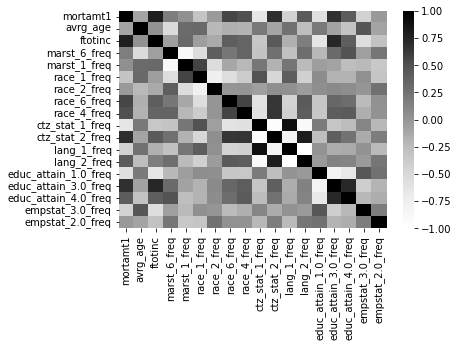

In [23]:
sns.heatmap(df_cor3, annot =False, annot_kws = dict(color ='g'), cmap = "Greys")

In [28]:
X = df6

#데이터 분할
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [29]:
##오버샘플링. 

from imblearn.over_sampling import SMOTE #synthetic minority over-sampling technique
from collections import Counter

X_train_over, Y_train_over = SMOTE(random_state = 0).fit_resample(X_train, Y_train)

print("original data %s" % Counter(Y))
print("original train data %s" % Counter(Y_train))
print("over train data %s" % Counter(Y_train_over))

original data Counter({1.0: 691, 0.0: 689})
original train data Counter({1.0: 495, 0.0: 471})
over train data Counter({0.0: 495, 1.0: 495})


In [30]:
X_train, Y_train = X_train_over, Y_train_over

In [31]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
std.fit(X_train)
X_train = std.transform(X_train)
#ct.fit(X_test)
X_test = std.transform(X_test)

In [32]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
X_train.columns = X.columns
X_test.columns = X.columns

In [33]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(C = 1, random_state = 0)

logit.fit(X_train, Y_train)
Y_pred = logit.predict(X_test)

print("R2 : {:.3f}" .format(logit.score(X_train, Y_train)))

from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))
print(logit.intercept_)
print(logit.coef_)    

R2 : 0.785
              precision    recall  f1-score   support

         0.0       0.82      0.80      0.81       218
         1.0       0.79      0.81      0.80       196

    accuracy                           0.80       414
   macro avg       0.80      0.80      0.80       414
weighted avg       0.80      0.80      0.80       414

[-0.2082175]
[[-0.70431439 -0.58186494  1.31664373 -1.06490974  0.11691083 -0.06296959
  -0.36362243  0.10652338 -0.03563349 -0.44485544 -0.88619328  0.15825696
  -0.15825696 -0.28545112 -0.71979681 -0.34479348  1.06539961 -0.15470281]]


In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=9, metric="euclidean")
knn_model.fit(X_train, Y_train)
Y_pred = knn_model.predict(X_test)
print("accuracy : {:.3f}".format(knn_model.score(X_train, Y_train)))
print(classification_report(Y_test,Y_pred))

accuracy : 0.822
              precision    recall  f1-score   support

         0.0       0.82      0.79      0.80       218
         1.0       0.77      0.80      0.79       196

    accuracy                           0.79       414
   macro avg       0.79      0.80      0.79       414
weighted avg       0.80      0.79      0.79       414



In [36]:
from sklearn.tree import DecisionTreeClassifier

DT_model = DecisionTreeClassifier(random_state = 0, max_depth = 3)
DT_model.fit(X_train, Y_train)

Y_pred = DT_model.predict(X_test)
print("accuracy : {:.3f}".format(DT_model.score(X_train, Y_train)))
print(classification_report(Y_test, Y_pred))

feature_name = X_train.columns
feature_importance = DT_model.feature_importances_
sorted(zip(feature_importance,feature_name), reverse = True)

accuracy : 0.749
              precision    recall  f1-score   support

         0.0       0.73      0.82      0.77       218
         1.0       0.77      0.67      0.71       196

    accuracy                           0.75       414
   macro avg       0.75      0.74      0.74       414
weighted avg       0.75      0.75      0.74       414



[(0.6159356215774733, 'marst_6_freq'),
 (0.20852792148482285, 'ctz_stat_2_freq'),
 (0.12055202122797264, 'educ_attain_3.0_freq'),
 (0.028090106664056622, 'mortamt1'),
 (0.02689432904567448, 'lang_1_freq'),
 (0.0, 'race_6_freq'),
 (0.0, 'race_4_freq'),
 (0.0, 'race_2_freq'),
 (0.0, 'race_1_freq'),
 (0.0, 'marst_1_freq'),
 (0.0, 'lang_2_freq'),
 (0.0, 'ftotinc'),
 (0.0, 'empstat_3.0_freq'),
 (0.0, 'empstat_2.0_freq'),
 (0.0, 'educ_attain_4.0_freq'),
 (0.0, 'educ_attain_1.0_freq'),
 (0.0, 'ctz_stat_1_freq'),
 (0.0, 'avrg_age')]

In [37]:
logit_model = LogisticRegression(C=1, random_state=0)
knn_model = KNeighborsClassifier(n_neighbors=9)
dt_model = DecisionTreeClassifier(random_state=0, max_depth=3)
logit_model.fit(X_train, Y_train)
knn_model.fit(X_train, Y_train)
dt_model.fit(X_train, Y_train)
logit_Y_pred = logit_model.predict(X_test)
knn_Y_pred = knn_model.predict(X_test)
dt_Y_pred = dt_model.predict(X_test)
print("logit score : {:.3f}".format(logit_model.score(X_train, Y_train)))
print("knn score : {:.3f}".format(knn_model.score(X_train, Y_train)))
print("dt score : {:.3f}".format(dt_model.score(X_train, Y_train)))

logit score : 0.785
knn score : 0.822
dt score : 0.749


In [38]:
print(classification_report(Y_test, logit_Y_pred))
print(classification_report(Y_test, knn_Y_pred))
print(classification_report(Y_test, dt_Y_pred))

              precision    recall  f1-score   support

         0.0       0.82      0.80      0.81       218
         1.0       0.79      0.81      0.80       196

    accuracy                           0.80       414
   macro avg       0.80      0.80      0.80       414
weighted avg       0.80      0.80      0.80       414

              precision    recall  f1-score   support

         0.0       0.82      0.79      0.80       218
         1.0       0.77      0.80      0.79       196

    accuracy                           0.79       414
   macro avg       0.79      0.80      0.79       414
weighted avg       0.80      0.79      0.79       414

              precision    recall  f1-score   support

         0.0       0.73      0.82      0.77       218
         1.0       0.77      0.67      0.71       196

    accuracy                           0.75       414
   macro avg       0.75      0.74      0.74       414
weighted avg       0.75      0.75      0.74       414



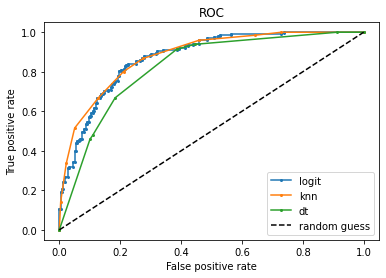

In [39]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt


fpr1, tpr1, threshold = roc_curve(Y_test, logit_model.decision_function(X_test))
fpr2, tpr2, threshold = roc_curve(Y_test, knn_model.predict_proba(X_test)[:,1])
fpr3, tpr3, threshold = roc_curve(Y_test, dt_model.predict_proba(X_test)[:,1])

#ROC
plt.plot(fpr1, tpr1, 'o-', ms=2, label = "logit")
plt.plot(fpr2, tpr2, 'o-', ms=2, label = "knn")
plt.plot(fpr3, tpr3, 'o-', ms=2, label = "dt")
plt.plot([0,1], [0,1],"k--", label = "random guess")

plt.legend()
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC")
plt.show()

In [40]:
logit_model_auc = roc_auc_score(Y_test, logit_model.decision_function(X_test)) 
knn_model_auc = roc_auc_score(Y_test, knn_model.predict_proba(X_test)[:,1])
dt_model_acu = roc_auc_score(Y_test, dt_model.predict_proba(X_test)[:,1])
print("logit AUC score: {:.3f}".format(logit_model_auc))
print("knn AUC score: {:.3f}".format(knn_model_auc))
print("dt AUC score: {:.3f}".format(dt_model_acu))

logit AUC score: 0.873
knn AUC score: 0.880
dt AUC score: 0.825


In [41]:
from sklearn.neural_network import MLPClassifier
nn_model = MLPClassifier(random_state=0, alpha = 0.001, hidden_layer_sizes = [50])
## 5-1. 모형학습
nn_model.fit(X_train, Y_train)

#6. 예측
Y_pred = nn_model.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [42]:
#7. 결과값 보고
print("Y 예측값 \n", Y_pred)
print("accuracy(train) : {:.3f}".format(nn_model.score(X_train, Y_train)))
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

Y 예측값 
 [0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0.
 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1.
 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0.
 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1.
 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1.
 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1.
 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1.
 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0.
 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1.
 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1.
 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 

In [45]:
from sklearn.neural_network import MLPClassifier
nn_model = MLPClassifier(random_state=10, alpha = 0.01, hidden_layer_sizes = [40])
## 5-1. 모형학습
nn_model.fit(X_train, Y_train)

#6. 예측
Y_pred = nn_model.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [46]:
#7. 결과값 보고
print("Y 예측값 \n", Y_pred)
print("accuracy(train) : {:.3f}".format(nn_model.score(X_train, Y_train)))
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

Y 예측값 
 [0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0.
 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1.
 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1.
 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1.
 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1.
 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0.
 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1.
 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1.
 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 

In [43]:
from sklearn.svm import SVC

SVC_model = SVC(C=1, random_state=0)
SVC_model.fit(X_train, Y_train)
Y_pred = SVC_model.predict(X_test)
print("accuracy : {:.3f}".format(SVC_model.score(X_train, Y_train)))
print(classification_report(Y_test, Y_pred))

accuracy : 0.816
              precision    recall  f1-score   support

         0.0       0.85      0.76      0.80       218
         1.0       0.76      0.85      0.80       196

    accuracy                           0.80       414
   macro avg       0.81      0.81      0.80       414
weighted avg       0.81      0.80      0.80       414



In [44]:
from sklearn.naive_bayes import GaussianNB

NB_model = GaussianNB(var_smoothing = 0)
NB_model.fit(X_train, Y_train)
Y_pred = NB_model.predict(X_test)
print("accuracy : {:.3f}".format(NB_model.score(X_train, Y_train)))
print(classification_report(Y_test, Y_pred))

accuracy : 0.726
              precision    recall  f1-score   support

         0.0       0.84      0.65      0.73       218
         1.0       0.69      0.86      0.76       196

    accuracy                           0.75       414
   macro avg       0.76      0.75      0.75       414
weighted avg       0.77      0.75      0.75       414



In [ ]:
import keras
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.metrics import Accuracy

#5.시드값 설정 : 시작점
np.random.seed(0)
tf.random.set_seed(0)

#6. 모형생성
model = keras.models.Sequential()
model.add(keras.layers.Dense(64, input_dim=18, activation = "relu")) #dim : 차원, 열수. 
model.add(keras.layers.Dense(64, activation = "relu"))
model.add(keras.layers.Dense(1, activation = "sigmoid"))

#7. 모형 학습
model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])
history = model.fit(X_train, Y_train, validation_split = 0.2, epochs = 200, 
                    batch_size = 64, verbose = 2)

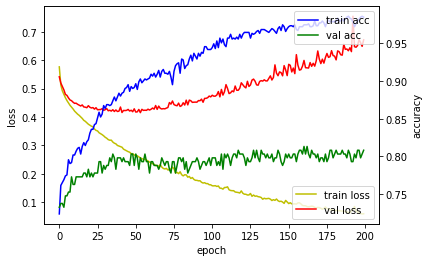

In [48]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

#loss(오차) 그리기
loss_ax.plot(history.history["loss"], "y", label = "train loss")
loss_ax.plot(history.history["val_loss"], "r", label = "val loss")
loss_ax.set_xlabel("epoch")
loss_ax.set_ylabel("loss")
loss_ax.legend(loc = "lower right")

#accuracy(정확도) 그리기
acc_ax.plot(history.history["accuracy"], "b", label = "train acc")
acc_ax.plot(history.history["val_accuracy"], "g", label = "val acc")
acc_ax.set_ylabel("accuracy")
acc_ax.legend(loc = "upper right")

plt.show()

In [49]:
Y_pred = model.predict(X_test,verbose = 0)
Y_class = np.round(Y_pred, 0)
train_score = model.evaluate(X_train, Y_train, verbose=0)
test_score = model.evaluate(X_test, Y_test, verbose=0)
print("Y 예측값 확률: \n ", Y_pred[:5])
print("Y 예측 클래스 : \n ", Y_class[:5])
print("train accuracy : {:.3f}".format(train_score[0], train_score[1]))
print("test accuracy : {:.3f}".format(test_score[0], test_score[1]))

Y 예측값 확률: 
  [[3.1311482e-01]
 [1.3920036e-03]
 [5.2725721e-07]
 [9.8300654e-01]
 [3.8780183e-01]]
Y 예측 클래스 : 
  [[0.]
 [0.]
 [0.]
 [1.]
 [0.]]
train accuracy : 0.180
test accuracy : 0.651


In [50]:
#5.단일모형 생성
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

dtree = DecisionTreeClassifier(random_state=0)
knn = KNeighborsClassifier()

#6.앙상블 모형 생성
model = VotingClassifier(estimators = [("K-NN", knn), ("Dtree", dtree)], voting = "soft")

#7.모형학습
model.fit(X_train, Y_train)

#8.예측 및 모형 성능 평가
Y_pred = model.predict(X_test)
print("Y predict value: \n", Y_pred)
#8-1. 보팅모형 정확도
print("voting classifier accuracy : {0:.3f}".format(model.score(X_test, Y_test)))
#8-2. 개별모형 정확도
classifiers = [dtree, knn]
for classifier in classifiers :
    classifier.fit(X_train, Y_train)
    class_name = classifier.__class__.__name__
    print("{0} accuracy : {1:.3f}".format(class_name, classifier.score(X_test,Y_test)))

Y predict value: 
 [0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0.
 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1.
 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1.
 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0.
 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1.
 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0.
 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0.
 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1.
 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1.
 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1.
 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0.
 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0.
 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0

In [51]:
#5. 모형 생성
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state = 0, n_estimators = 300, max_depth = 3)

#6. 모형 예측 평가
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
print("Y predict value: \n", Y_pred)
print("accuracy(test) : {:.3f}".format(model.score(X_test, Y_test)))
print(classification_report(Y_test, Y_pred))

Y predict value: 
 [0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0.
 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0.
 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0.
 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1.
 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1.
 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0.
 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0.
 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1.
 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1.
 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1

In [52]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(random_state = 0, n_estimators = 100, max_depth = 4, 
                                   learning_rate = 0.1)

#6.모형 학습 예측
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
print("Y predict value: \n", Y_pred)
print("accuracy(test) : {:.3f}".format(model.score(X_test, Y_test)))
print(classification_report(Y_test, Y_pred))

Y predict value: 
 [0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0.
 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1.
 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0.
 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0.
 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1.
 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0.
 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1.
 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0.
 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0.
 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0.
 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1.
 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0.
 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0